# Load Packages

In [1]:
import os
import glob
import numpy as np
import librosa, librosa.display
import pandas as pd
import sklearn
from pathlib import Path
from sklearn import preprocessing
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load Data (CSV)

In [2]:
#measCsv=r'C:\python\gits\taylorsversion\CSVs'
cwd = Path.cwd()
measCsv=str(cwd)+'\\CSVs'
folds=glob.glob(str(measCsv+'\\*'))

# Prepare Data

In [ ]:
nfeatures = {0: 6,
             1: 7,
             2: 8,
             3: 9,
             4: 10,
             5: 11,
             6:12,
             7:13,
             8:14,
             9:15,
             10:16,
             11:17,
             12:18,
             13:19,
             14:20,
             15:6,
             16:7,
             17:8,
             18:9,
             19:10,
             20: 11,
             21: 12,
             22: 13,
             23: 14,
             24: 15,
             25: 16,
             26:17,
             27:18,
             28:19,
             29:20}
STD=[False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
    ] 

In [12]:
features = {1: 'PhaseSpace',
            2: 'ChannelCorrelation',
            3: 'PeakMeter',
            4: 'RMS',
            5: 'CrestFactor',
            6: 'PhaseSpaceLow',
            7: 'ChannelCorrelationLow',
            8: 'PeakMeterLow',
            9: 'RMSLow',
            10 : 'CrestFactorLow',
           11 : 'PhaseSpaceMid',
           12 : 'ChannelCorrelationMid',
           13 : 'PeakMeterMid',
            14 : 'RMSMid',
           15 : 'CrestFactorMid',
           16 : 'PhaseSpaceHigh',
           17 : 'ChannelCorrelationHigh',
            18 : 'PeakMeterHigh',
            19 : 'RMSHigh',
           20 : 'CrestFactorHigh'
           }
nfeatures = {0: 1,
             1: 3,
             2: 4,
             3: 5,
             4: 6,
             5: 8,
             6:9,
             7:10,
             8:12,
             9:15,
             10:17,
             11:20,
             12:1,
             13:3,
             14:4,
             15:5,
             16:6,
             17:8,
             18:9,
             19:10,
             20: 12,
             21: 15,
             22: 17,
             23: 20}
STD=[False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
    ] 
numfeatures = len(nfeatures)

In [13]:
train_X = np.array([np.zeros(numfeatures)])
target = []
color_map = {}
classname = []

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(files)
    lal1 = np.empty((numfiles, numfeatures))
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        # print(f)
        classname.append(cl)
        for dt, i in enumerate(nfeatures):
            if STD[dt]:
                # calculate standard deviation of feature over time
                lal1[j][i-1] = la[features[nfeatures[i]]].std()
            else:
                # calculate mean of features over time
                lal1[j][i-1] = la[features[nfeatures[i]]].median()#!?!median()

    train_X = np.concatenate((train_X, lal1))
    target = target + [(str(Path(fold).relative_to(measCsv)), i+1)
                       for i in range(0, len(lal1))]

    color_map[str(Path(fold).relative_to(measCsv))] = cl

train_X = train_X[1:]

In [14]:
scaler = preprocessing.StandardScaler().fit(train_X) #skalieren die einzelen features auf Mean=0 und Std=1
lal = scaler.transform(train_X)

In [46]:
y=classname#each row includes the class number
X=train_X# each row includes all attribute magnitudes of a single item
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## Random Forest Classifier

In [47]:
rf = RandomForestClassifier()#load an instance of the RF classifier
rf.fit(X_train, y_train)
print(f'Train Accuracy: {rf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test):.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.500


              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.54      0.58      0.56        12

    accuracy                           0.61        28
   macro avg       0.60      0.60      0.60        28
weighted avg       0.61      0.61      0.61        28

Train Accuracy: 1.000
Test Accuracy: 0.607


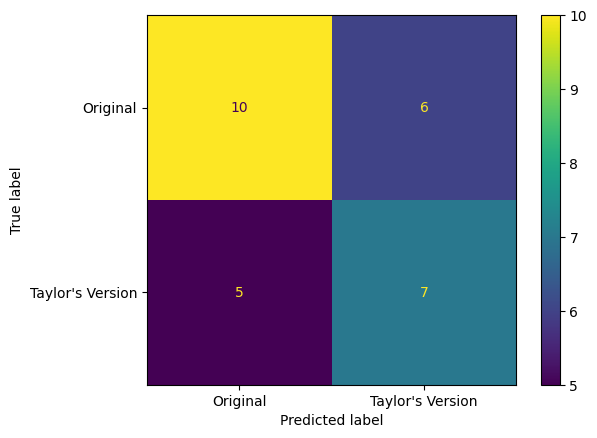

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_predict = rf.predict(X_test)
cmrf = confusion_matrix(y_test, rf_predict)
cmdrf = ConfusionMatrixDisplay(cmrf, display_labels=["Original", "Taylor's Version"])
cmdrf.plot()
print(classification_report(y_test, rf_predict))
print(f'Train Accuracy: {rf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test):.3f}')

# Naive Bayes Classifier

Train Accuracy: 0.782
Test Accuracy: 0.500
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.45      0.38      0.42        13

    accuracy                           0.50        28
   macro avg       0.49      0.49      0.49        28
weighted avg       0.49      0.50      0.49        28

[[9 6]
 [8 5]]


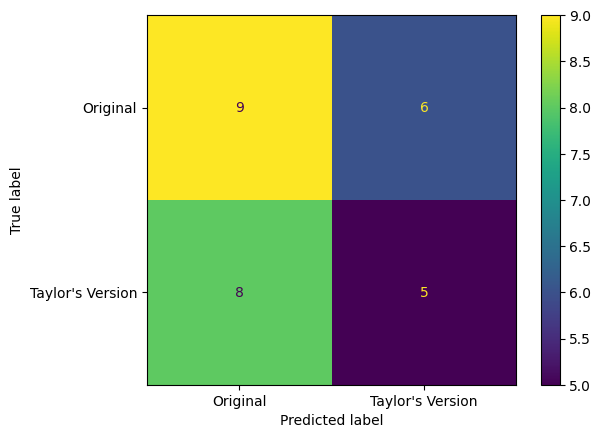

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

y_pred = model.predict(X_test)

print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {model.score(X_test, y_test):.3f}')


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cmmlp = confusion_matrix(y_test, y_pred)
cmdmlp = ConfusionMatrixDisplay(cmmlp, display_labels=["Original","Taylor's Version"])
cmdmlp.plot()